## IMPORTS
En esta primera sección se hacen los imports necesarios para que el desarrollo del trabajo fluya bien

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Punto A
### Lectura de la base de datos
La base de [datos](#referencias) se descargó de la página oficial del Gobierno de México. Este archivo es un Excel de 3 pestañas, la segunda pestaña es la que se debe guardar como *csv* y moverla a la carpeta donde se tiene la libreta que esté usando.

In [2]:
# encoding diferente del que viene por default ya que la lectura no se estaba dando correctamente
imm = pd.read_csv('IMM_2020.csv', encoding='latin-1')
imm.head(3)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453


Como la abreviación de las columnas no nos permite entender completamente lo que nos quieren decir, se adjuntó una imagen del archivo excel original que los describe:

![Alt text](image.png)

## Punto B
### Descripción del DataFrame

In [3]:
# 'object' es el tipo de dato que se le asigna a las variables que no son numéricas
imm.describe(include='object')

,NOM_ENT,NOM_MUN,GM_2020
count,2469,2469,2469
unique,32,2328,5
top,Oaxaca,Benito Juárez,Muy bajo
freq,570,7,655


Como se puede observar, es una base de datos que cuenta con 2469 datos; en los estados (NOM_ENT) tenemos que hay 32 valores únicos, era un valor esperado ya que México tiene 32 entidades federativas, luego tenemos una cantidad de 2328 municipios diferentes, y una clasificación de *Grado de marginación* de 5 tipos diferentes.

Además, podemos ver que en *top* se encuentra Oaxaca, esto indica que es el valor que más aparece en la columna de NOM_ENT, Benito Juárez vendría siendo el municipio que más se repite, y la clasificación "Muy Bajo" igual.


In [4]:
# 'number' es el tipo de dato que se le asigna a las variables que son numéricas
imm.describe(include='number')

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


Ignorando las primeras dos columnas (claves de la entidad y municipio) ya que sólo son claves para representar lugares, el análisis lo vamos a hacer de otras columnas y principalmente de columnas que sean de porcentajes. Siendo que *mean* es muy subjetivo y para darle una interpretación acertada tendríamos que graficar y observar cómo están esparcidos los datos; además, este .describe() incluye a todos los estados y a toda la población del DataFrame, inferior algo con esto también caería en algo errado. Por esto, veremos lo que nos dice *min* y *max*. 

* En *min* vemos que son pocos los porcentajes que destacan, sin embargo hay uno que a pesar de ser el mínimo, tiene un valor no tan pequeño. En la columna PO2SM vemos que el valor mínimo es de 28.45%, quiere decir que hay un registro donde el porcentaje de población de personas empleadas y que reciben un salario que no supera al equivalente a dos veces el salario mínimo (que se establece en México).
* En *max* vemos que hay porcentajes más elevados, lugares en el país donde hay un porcentaje elevado de su población, donde las personas viven sin agua entubada, sin energía eléctrica, sin drenaje ni excusado, sin educación básica, entre otras.

Este análisis es bastante subjetivo ya que los porcentajes poblacionales depende de eso, de la población, si hay un lugar donde el 100% de su población es analfabeta pero sólo viven 10 personas en ese lugar, pues claramente podemos asustarnos sin saber el contexto de la cantidad de personas que habitan ahí. 

## Punto C
### Porcentaje de municipios por estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto"

In [5]:
# Agrupamos y seleccionamos las columnas que nos interesan para conocer el número de registros por entidad
SUM_MUN = imm.groupby(['NOM_ENT'])[['NOM_MUN']].nunique()
SUM_MUN.head(2)

,NOM_MUN
NOM_ENT,
Aguascalientes,11
Baja California,6


In [6]:
# Agrupamos, seleccionamos, dividimos y ordenamos las columnas que nos interesan para conocer el porcentaje de municipios por entidad
P_MUN = imm.groupby(['NOM_ENT','GM_2020'])[['NOM_MUN']].nunique()
P_MUN['Mun_xciento']  = P_MUN.NOM_MUN / SUM_MUN.NOM_MUN * 100
P_MUN = P_MUN.reset_index()  
P_MUN.head(4)

,NOM_ENT,GM_2020,NOM_MUN,Mun_xciento
0,Aguascalientes,Muy bajo,11,100.000000
1,Baja California,Medio,1,16.666667
2,Baja California,Muy bajo,5,83.333333
3,Baja California Sur,Muy bajo,5,100.000000


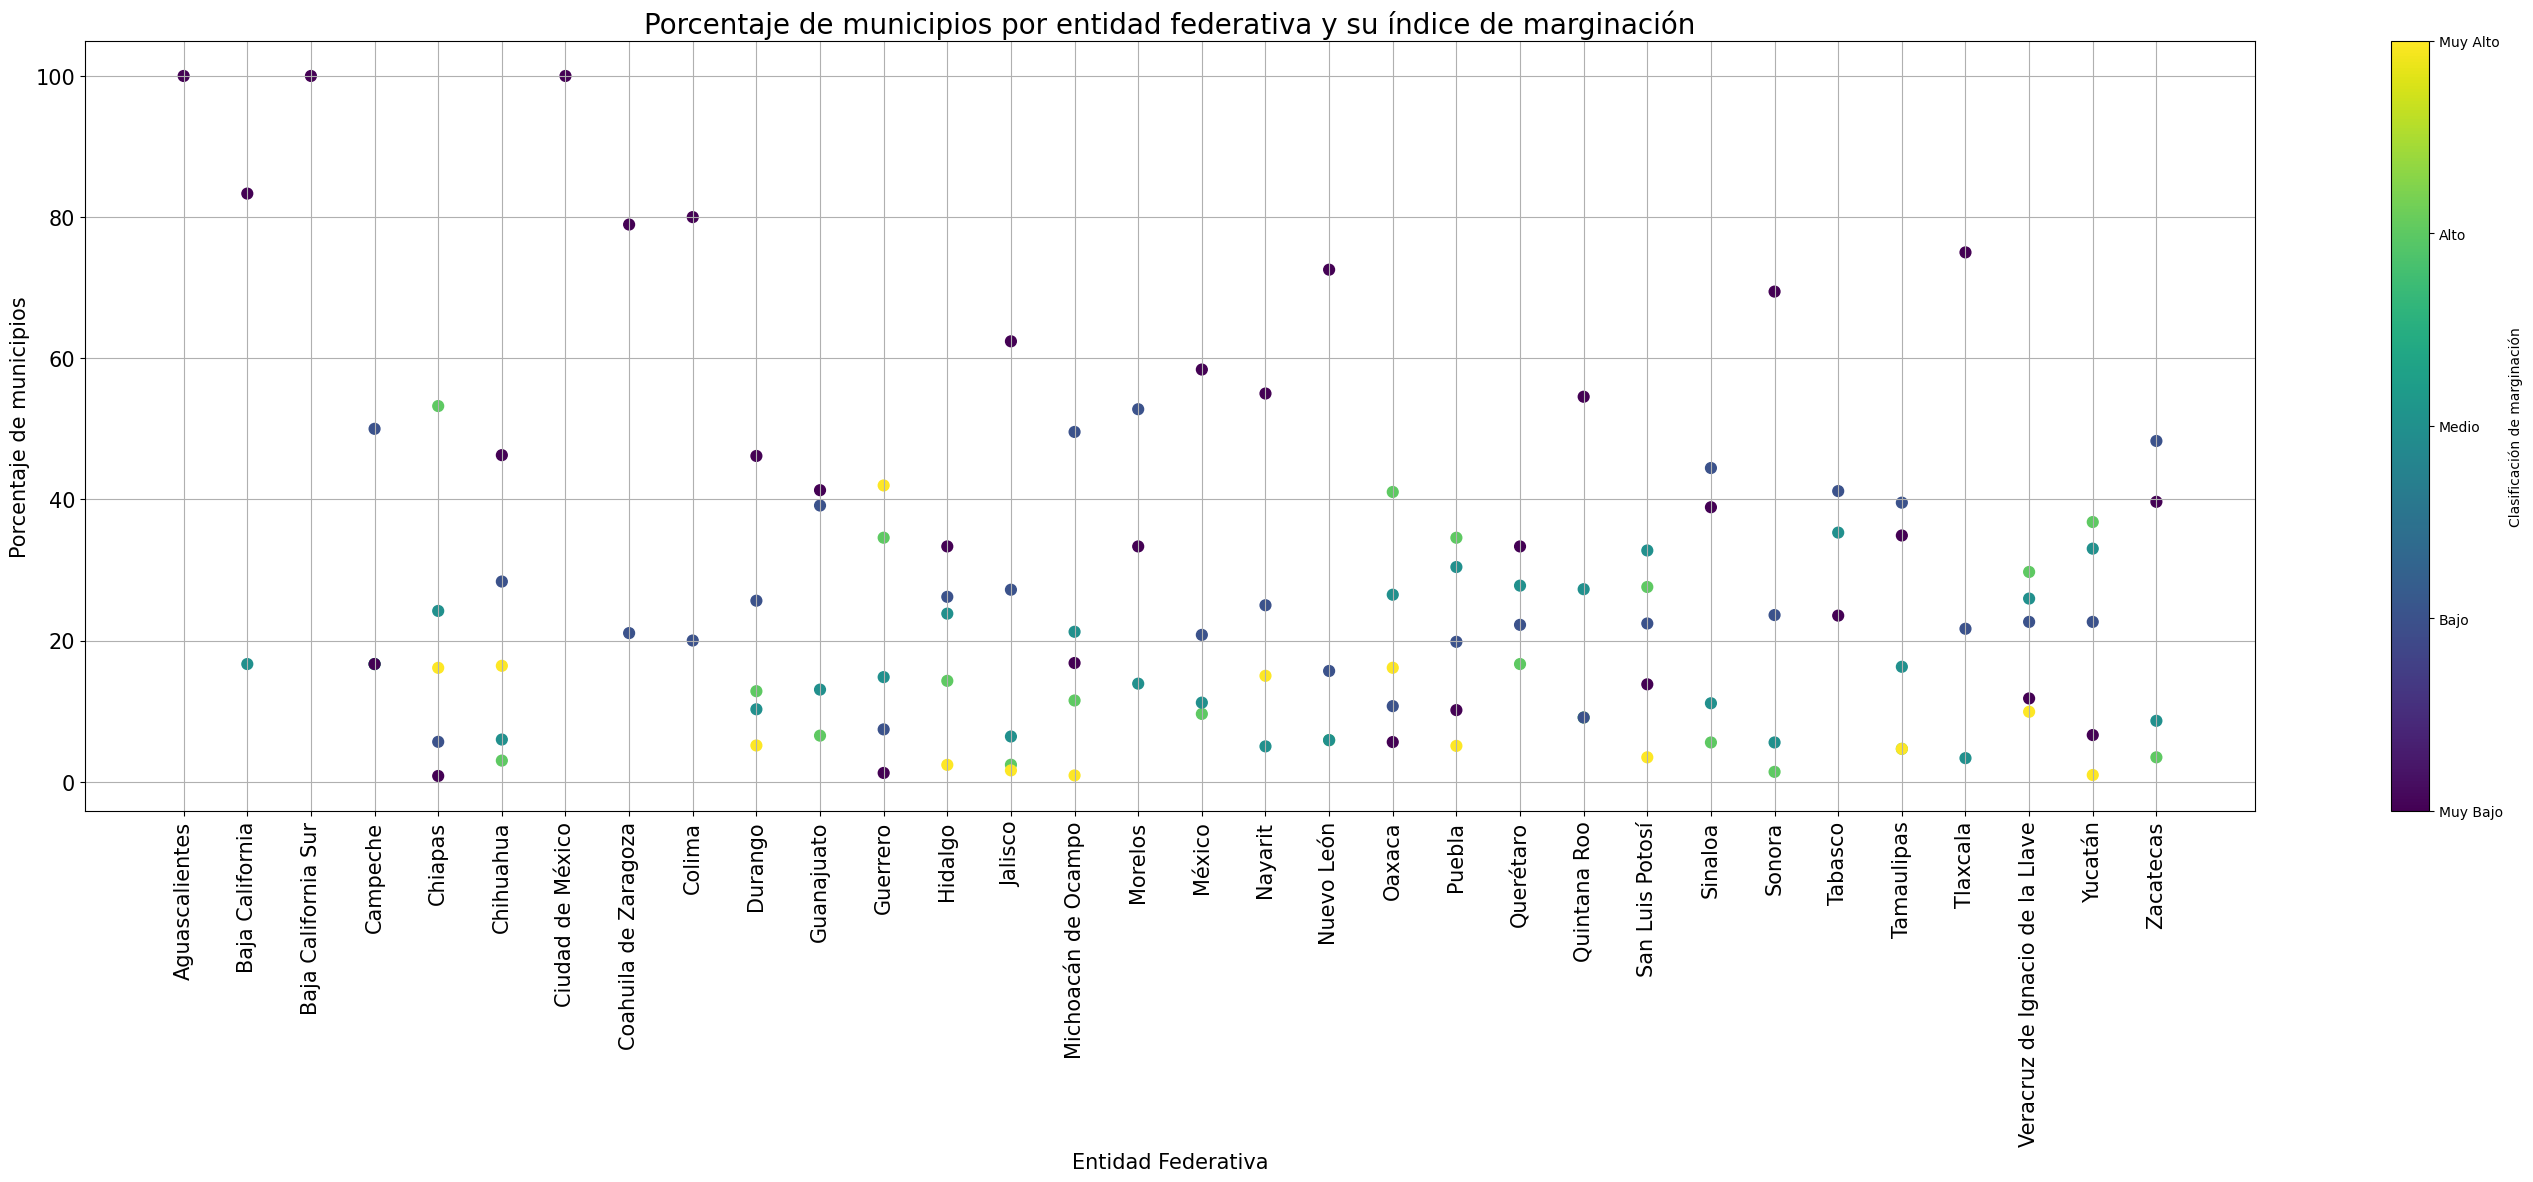

In [7]:
# Creamos un diccionario para asignarle un color a cada categoría de marginación
color_mapping = {
    'Muy bajo': 0.2,
    'Bajo': 0.4,
    'Medio': 0.6,
    'Alto': 0.8,
    'Muy alto': 1.0
}

# Graficamos el porcentaje de municipios por entidad federativa y su índice de marginación
x = P_MUN['NOM_ENT']
y = P_MUN['Mun_xciento']
colors = P_MUN['GM_2020'].map(color_mapping)

# Setteamos el tamaño de la figura y los parámetros de la gráfica
plt.figure(figsize=(35, 10))
plt.scatter(x, y, c=colors, alpha=1, s=60)

# Agregamos un título y etiquetas a los ejes
plt.title('Porcentaje de municipios por entidad federativa y su índice de marginación', fontsize=20)
plt.xlabel('Entidad Federativa', fontsize=15)
plt.ylabel('Porcentaje de municipios', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)

# Agregamos una barra de color para identificar las categorías de marginación
cbar = plt.colorbar(label='Clasificación de marginación')
cbar.set_ticks([0.2, 0.4, 0.6, 0.8, 1.0])
cbar.set_ticklabels(['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Guardamos la gráfica y la mostramos
plt.grid(True)
plt.savefig('plot_1.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

## Punto D
### Porcentaje de la población, respecto a la población total de cada estado, con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto"

In [8]:
# Similar al punto pasado pero ahora con la población total de cada entidad
SUM_POB = imm.groupby(['NOM_ENT'])[['POB_TOT']].sum()
SUM_POB.head(4)

,POB_TOT
NOM_ENT,
Aguascalientes,1425607
Baja California,3769020
Baja California Sur,798447
Campeche,928363


In [9]:
# Agrupamos, seleccionamos, dividimos y ordenamos las columnas que nos interesan para conocer el porcentaje de población por entidad
P_POB = imm.groupby(['NOM_ENT','GM_2020'])[['POB_TOT']].sum()
P_POB['Pob_xciento']  = P_POB.POB_TOT/SUM_POB.POB_TOT * 100
P_POB.reset_index(inplace=True)
P_POB.head(4)

,NOM_ENT,GM_2020,POB_TOT,Pob_xciento
0,Aguascalientes,Muy bajo,1425607,100.000000
1,Baja California,Medio,117568,3.119325
2,Baja California,Muy bajo,3651452,96.880675
3,Baja California Sur,Muy bajo,798447,100.000000


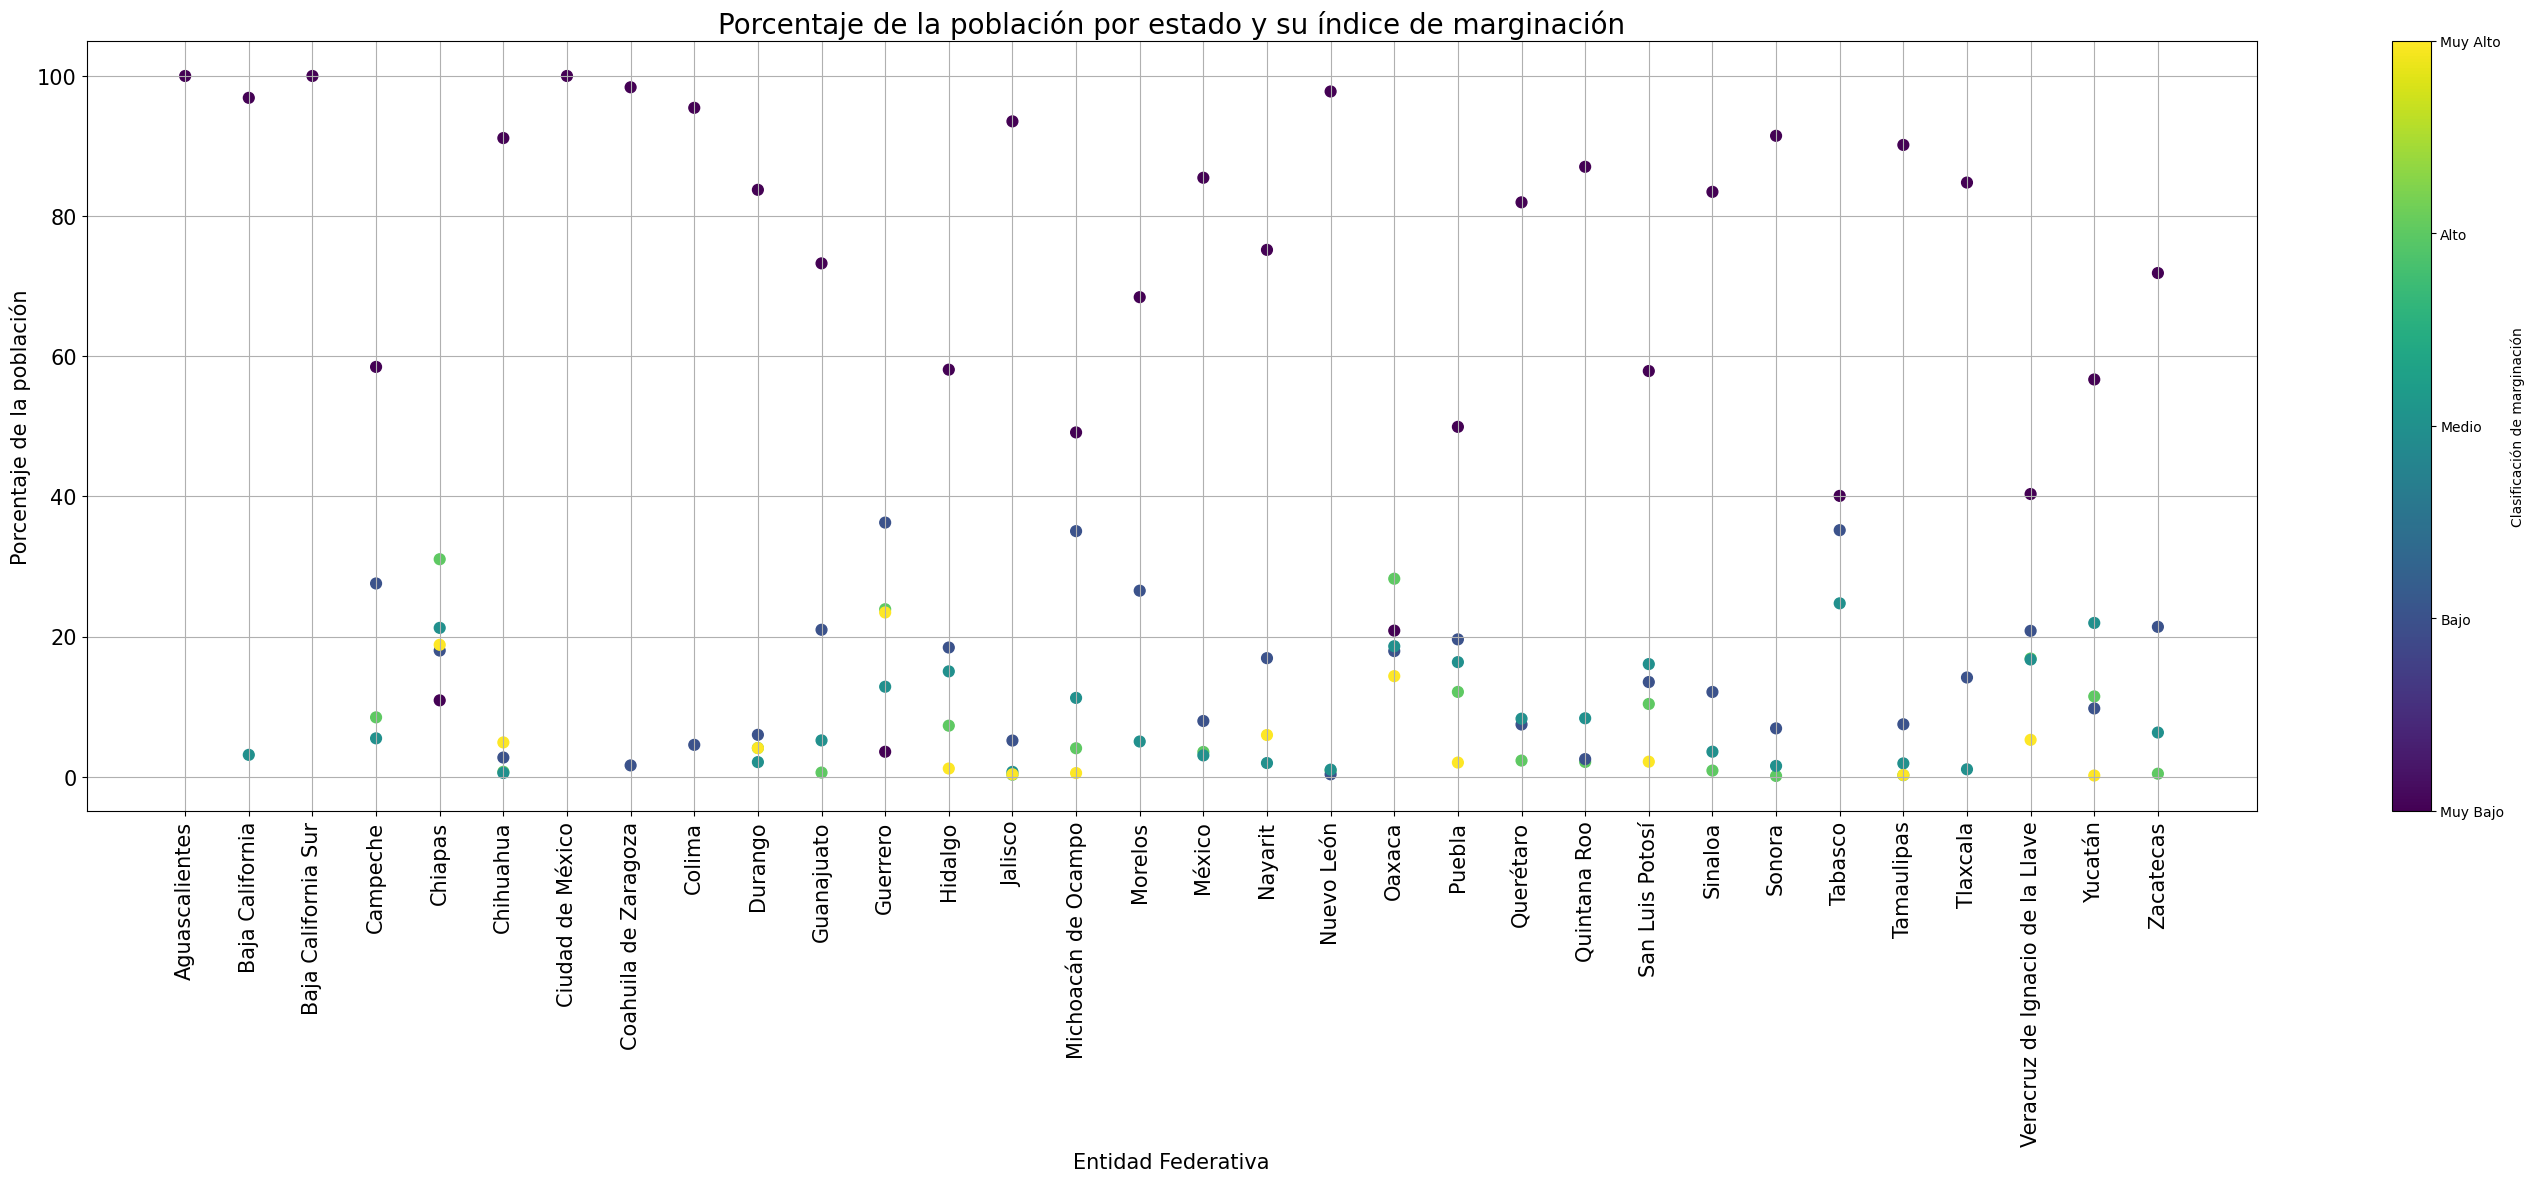

In [10]:
# Misma idea del codigo anterior, pero ahora con la población
# Hacemos un diccionario para asignarle un color a cada categoría de marginación
color_mapping = {
    'Muy bajo': 0.2,
    'Bajo': 0.4,
    'Medio': 0.6,
    'Alto': 0.8,
    'Muy alto': 1.0
}

# Graficamos el porcentaje de la población por entidad federativa y su índice de marginación
x = P_POB['NOM_ENT']
y = P_POB['Pob_xciento']
colors = P_POB['GM_2020'].map(color_mapping)

# Setteamos el tamaño de la figura y los parámetros de la gráfica
plt.figure(figsize=(35, 10))
plt.scatter(x, y, c=colors, alpha=1, s=60)

# Agregamos un título y etiquetas a los ejes
plt.title('Porcentaje de la población por estado y su índice de marginación', fontsize=20)
plt.xlabel('Entidad Federativa', fontsize=15)
plt.ylabel('Porcentaje de la población', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)

# Agregamos una barra de color para identificar las categorías de marginación
cbar = plt.colorbar(label='Clasificación de marginación')
cbar.set_ticks([0.2, 0.4, 0.6, 0.8, 1.0])
cbar.set_ticklabels(['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Guardamos la gráfica y la mostramos
plt.grid(True)
plt.savefig('plot_2.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

## Punto E
### Análisis de las gráficas anteriores

Antes de hacer un análisis hay que aclarar lo siguiente:
* Hay puntos dentro de las gráficas que se empalman.
    * Ejemplo, dentro de la primera gráfica, en Campeche, vemos que sólo hay 2 puntos; en realidad no son sólo 2 puntos, si no que hay puntos que tienen el mismo porcentaje y se empalmaron sobre ese. Aclaración con el fin de evitar confuciones.
* Los puntos amarillos vendrían siendo los más preocupantes, dado que son los que indican que la marginación es muy alta.
* Comparando la morfología de ambas gráficas, sin ver los rangos ni nada de eso, vemos que en la primera gráfica la mayoría de los puntos están más juntos, y en la segunda vemos que esos puntos ya luego se separan más (separación vertical).

Este tipo de gráficas nos permite ver la relación entre 3 variables, la entidad, el porcentaje de municipios/población y cómo se distribuyen las clasificaciones dependiendo el porcentaje asignado. 
- Primera gráfica:
    - Vemos que hay estados donde la mayoría de sus municipios sufren de una marginación *Muy baja*.
        - Aguascalientes, las Bajas Californias, CDMX, Nuevo León, entre otras entidades.
    - Hay entidades que tienen un porcentaje alto de municipios con marginación *Alta*, al punto donde hay más municipios con marginación alta que municipios con otro tipo de marginación.
        - Caso donde destaca Oaxaca, Puebla, Veracruz, Yucatán, Chiapas y otros.
    - Guerrero es el único estado donde vemos que casi la mitad (o poco más del 40%) de sus municipios están en una clasificación de marginación *Muy alta*. 
        - Es verdad que Guerrero no tiene tantos municipios (como Oaxaca), sólo tiene 81, por lo tanto son como 32 municipios los que caen dentro de esta clasificación. Sin embargo, si observamos la gráfica, vemos que el punto que le sigue es uno de marginación *Alta*, de hecho, es el único estado (o entidad) que mientras baja su porcentaje, baja su clasificación al mismo orden que la barra de colores.
    - Entidades con pocos municipios se ve afectado el % de manera drástica.
* Segunda gráfica:
    - Vemos el impacto de trabajar con el % de la población de cada municipio en relación a la población total por entidad.
    - En la gráfica anterior había porcentajes donde la clasificación predominante era la *Alta*, en esta gráfica vemos que ya no es así, la mayoría son de clasificación *Muy baja*.
        - Puebla, Veracruz, Yucatán y Guerrero ya no presentan el comportamiento de la gráfica anterior, se puede ver que la mayoría de su población (correspondiente), están una clasificación *Muy baja*.
        - En el caso de Guerrero, la mayoría de su población está dentro de la clasificación *Baja*, sin embargo, vemos que los segundos porcentajes por debajo de este son de clasificación *Alta* y *Muy alta*, para un mejor análisis sería bueno transformar el porcentaje a cantidad de personas.
    - Oaxaca es el estado con más municipios en México, y vemos que la mayoría de su población se encuentra en una clasificación de marginación *Alta*, mismo comportamiento que en la gráfica anterior donde el % de municipios también era clasificación *Alta*.
        - Si bien, el segundo punto cae dentro de la clasificación *Muy baja*, los demás puntos no se encuentran tan separados de este, por lo tanto, todavía hay una gran cantidad de personas que sufren de marginación.

## Punto F

In [11]:
# Como solo queremos ver una relación entre dos variables, seleccionamos esas dos columnas y aplicamos la condición indicada
PvA = imm[['POB_TOT','ANALF']].loc[imm['POB_TOT'] < 5_000] # PxA : Población v Analfabetismo
PvA.describe()

,POB_TOT,ANALF
count,674.000000,674.000000
mean,2388.129080,12.254366
std,1379.987981,8.298147
min,81.000000,1.089918
25%,1186.250000,5.834357
50%,2202.000000,10.230355
75%,3525.500000,17.181669
max,4988.000000,49.801324


Text(0, 0.5, 'Analfabetismo')

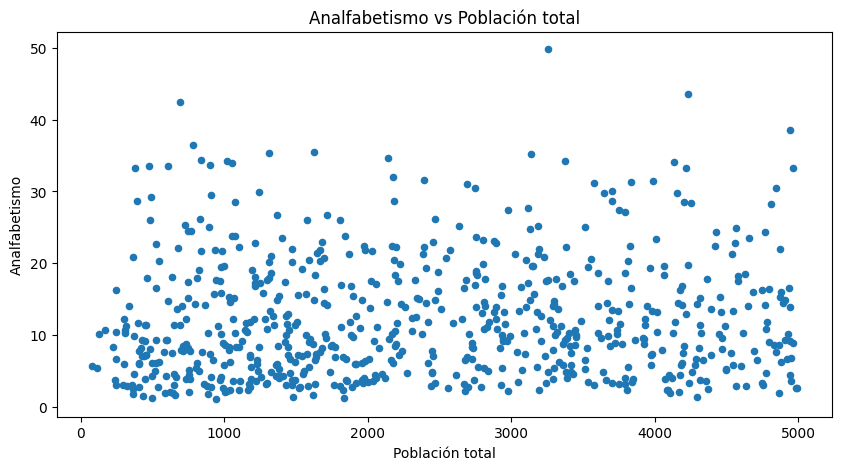

In [12]:
# Para ver la relación entre las dos variables, graficamos una contra la otra en scatter
PvA.plot.scatter(x='POB_TOT', y='ANALF', figsize=(10, 5))
plt.title('Analfabetismo vs Población total')
plt.xlabel('Población total')
plt.ylabel('Analfabetismo')

Esta gráfica, o relación, no nos dice mucho. Queríamos ver si había una influencia en el analfabetismo de la población con respecto a la cantidad de habitantes de cada municipio. Por lo que alcanzamos a observar, no es así, los porcentajes varían pero no parece existir relación entre ambas variables.

## Punto G
### Correlaciones

Si queremos saber qué, o cuál, variable tiene mejor correlación con el porcentaje de analfabetismo en personas mayores de 15 años, pues hagamos una correlación.

In [13]:
# Vemos las columnas dentro de la base de datos para saber cuáles son las que nos interesan
imm.columns

Index(['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'POB_TOT', 'ANALF', 'SBASC',
       'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM',
       'IM_2020', 'GM_2020', 'IMN_2020'],
      dtype='object')

In [14]:
# Hacemos una correlación entre las variables que nos interesan, las que creeemos que pueden tener una relación
imm_corr= imm[['POB_TOT', 'ANALF', 'SBASC', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM']].corr(numeric_only=True)
imm_corr
# numeric_only=True para que solo tome en cuenta las variables numéricas ; así indicaba el warning

,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM
POB_TOT,1.000000,-0.236801,-0.387466,-0.111017,-0.105180,-0.092102,-0.161628,-0.206148,-0.422541,-0.410937
ANALF,-0.236801,1.000000,0.779053,0.347537,0.351523,0.360644,0.644960,0.658532,0.449324,0.620011
SBASC,-0.387466,0.779053,1.000000,0.259337,0.296920,0.269822,0.548058,0.521014,0.598548,0.702248
OVSDE,-0.111017,0.347537,0.259337,1.000000,0.529746,0.219278,0.279222,0.374002,0.205200,0.204174
OVSEE,-0.105180,0.351523,0.296920,0.529746,1.000000,0.343723,0.501319,0.308139,0.231066,0.197733
OVSAE,-0.092102,0.360644,0.269822,0.219278,0.343723,1.000000,0.391056,0.319650,0.189617,0.276074
OVPT,-0.161628,0.644960,0.548058,0.279222,0.501319,0.391056,1.000000,0.615184,0.338568,0.477667
VHAC,-0.206148,0.658532,0.521014,0.374002,0.308139,0.319650,0.615184,1.000000,0.269036,0.580601
PL.5000,-0.422541,0.449324,0.598548,0.205200,0.231066,0.189617,0.338568,0.269036,1.000000,0.575018
PO2SM,-0.410937,0.620011,0.702248,0.204174,0.197733,0.276074,0.477667,0.580601,0.575018,1.000000


Text(0.5, 1.0, 'Correlación entre variables')

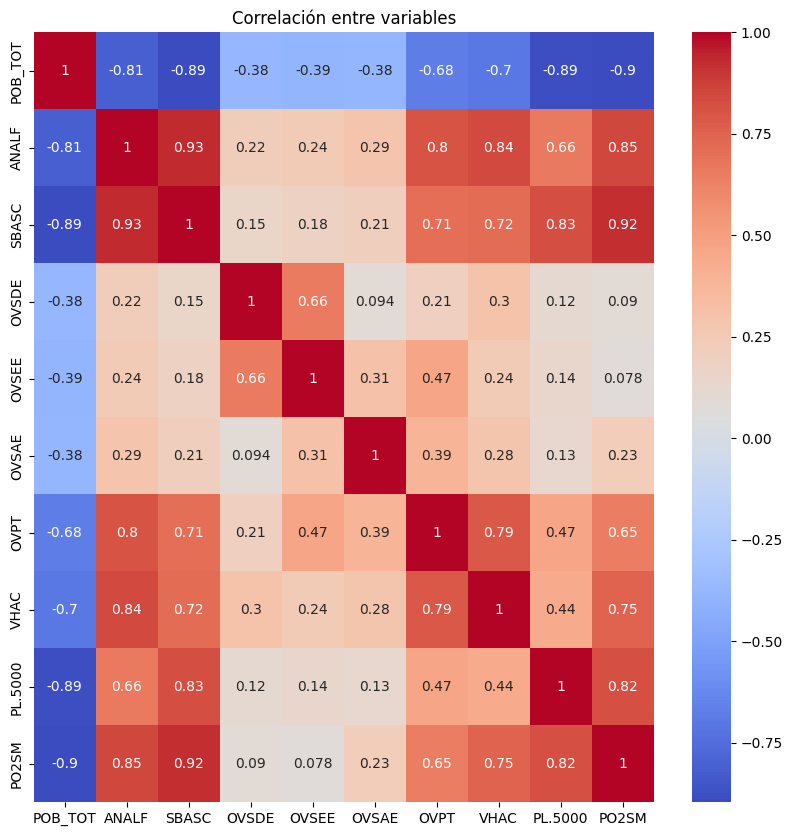

In [15]:
# Como es dificil de ver esa correlación con tantos números y columnas, mejor la graficamos en un heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(imm_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')

Recordemos que nos interesa la relación que pueda tener el % de analfabetismo de personas mayores de 15 años con cualquier otra variable que parezca, o indique, alguna relación de por medio. \
Si observamos el heatmap, la hay.
- Recordemos que la relación puede ser positiva (si aumenta uno, aumenta el otro) o negativa (aumenta una y disminuye el otro).
- Relaciones con un valor de 0.00 no significa que no tengan relación, sin embargo su relación no es lineal entre esas dos variables.
- Las variables que relación lineal más fuerte tienen con el % de analfabetismo son:
    - % de población de 15 años, o más, sin educación básica.
    - % de ocupantes en viviendas particulares habitadas con piso de tierra.
    - % de viviendas particulares con hacinamientos[^1].
    - % de población ocupada con ingresos de hasta 2 salarios mínimos
- La experiencia nos dice que no podemos afirmar 100% hasta que hagamos un estudio más profundo, además, no podemos decir que esta relación sigue existiendo dado que los datos son del 2020, hoy en día tendríamos que trabajar con datos más frescos y ver cómo ha variado todo esto.

[^1]: El hacinamiento se refiere a una situación en la cual las personas viven en espacios muy reducidos o insuficientes para el número de individuos que los ocupan.org

## Punto H
### Nuevo DataFrame con otros indicadores

In [16]:
# % Personas sin Electricidad, Drenaje, Agua Entubada
porcentajes = imm[['NOM_ENT','NOM_MUN','GM_2020', 'POB_TOT','ANALF','SBASC','OVSEE','OVSDE', 'OVSAE']].copy()
porcentajes['ANALF'] = ((porcentajes['ANALF'] * porcentajes['POB_TOT']) / 100).round(0)
porcentajes['SBASC'] = ((porcentajes['SBASC'] * porcentajes['POB_TOT']) / 100).round(0)
porcentajes['OVSEE'] = ((porcentajes['OVSEE'] * porcentajes['POB_TOT']) / 100).round(0)
porcentajes['OVSDE'] = ((porcentajes['OVSDE'] * porcentajes['POB_TOT']) / 100).round(0)
porcentajes['OVSAE'] = ((porcentajes['OVSAE'] * porcentajes['POB_TOT']) / 100).round(0)
porcentajes.head(4)


,NOM_ENT,NOM_MUN,GM_2020,POB_TOT,ANALF,SBASC,OVSEE,OVSDE,OVSAE
0,Aguascalientes,Aguascalientes,Muy bajo,948990,15608.0,193283.0,1074.0,995.0,3593.0
1,Aguascalientes,Asientos,Muy bajo,51536,1817.0,17474.0,251.0,1366.0,442.0
2,Aguascalientes,Calvillo,Muy bajo,58250,2616.0,24746.0,301.0,213.0,467.0
3,Aguascalientes,Cosío,Muy bajo,17000,535.0,4708.0,98.0,121.0,112.0


In [23]:
def politicas_publicas(entidad:str):
    copy = porcentajes.loc[porcentajes['NOM_ENT'] == entidad].copy()
    copy.reset_index(drop=True)
    opciones = []
    dict = { 1:'ANALF', 2:'SBASC', 3:'OVSDE', 4:'OVSEE', 5:'OVSAE'}
    dict_2 = { 'ANALF': 'Analfabetismo', 'SBASC': 'Sin educación básica', 'OVSDE': 'Sin drenaje', 'OVSEE': 'Sin electricidad', 'OVSAE': 'Sin agua entubada'}

    print("""
    Bienvenido al programa de políticas públicas para el estado de {entidad}, ¿Cuáles son las variables que desea analizar?
    Nota: Puede repetir valores pero no influye en el resultado final
    """)
    while(True):
        print("""
        [1] Analfabetismo (Población de 15 años y más)
        [2] Sin educación básica (Población de 15 años y más)
        [3] Sin drenaje
        [4] Sin electricidad
        [5] Sin agua entubada
        [6] Salir
        """)
        opcion = int(input('Ingrese su opción: '))
        if opcion == 6:                                     # Para que se salga del programa
            break
        elif opcion > 6 or opcion < 1:                      # Para que no se salga del rango de opciones
            print('Opción no válida')
            pass
        else:                                               # Para que continue con el programa
            opciones.append(opcion)
            pass
    lista = set(opciones)                                   # Para que no se repitan las opciones
    
    variables = [dict.get(n, n) for n in lista]                              # Para buscar las columnas dentro del DataFrame
    var_2 = [dict_2.get(n, n) for n in variables]                            # Para extraer el nombre de la(s) variable(s)
    variables2 = ', '.join(var_2)                                            # Para poner en el título de la gráfica y en la leyenda

    copy.groupby(['GM_2020'])[variables].sum().plot.bar(figsize=(10, 5))
    plt.title(f'Personas en situación de {variables2} en {entidad}')
    plt.xlabel('Índice de marginación')
    plt.ylabel(f'Número de Personas')
    plt.legend(var_2)
    #copy.to_parquet(f'{entidad}.parquet', index=False)
    copy.to_csv(f'{entidad}.csv', index=False)


    Bienvenido al programa de políticas públicas para el estado de {entidad}, ¿Cuáles son las variables que desea analizar?
    Nota: Puede repetir valores pero no influye en el resultado final
    

        [1] Analfabetismo (Población de 15 años y más)
        [2] Sin educación básica (Población de 15 años y más)
        [3] Sin drenaje
        [4] Sin electricidad
        [5] Sin agua entubada
        [6] Salir
        

        [1] Analfabetismo (Población de 15 años y más)
        [2] Sin educación básica (Población de 15 años y más)
        [3] Sin drenaje
        [4] Sin electricidad
        [5] Sin agua entubada
        [6] Salir
        

        [1] Analfabetismo (Población de 15 años y más)
        [2] Sin educación básica (Población de 15 años y más)
        [3] Sin drenaje
        [4] Sin electricidad
        [5] Sin agua entubada
        [6] Salir
        

        [1] Analfabetismo (Población de 15 años y más)
        [2] Sin educación básica (Población de 15 años y más

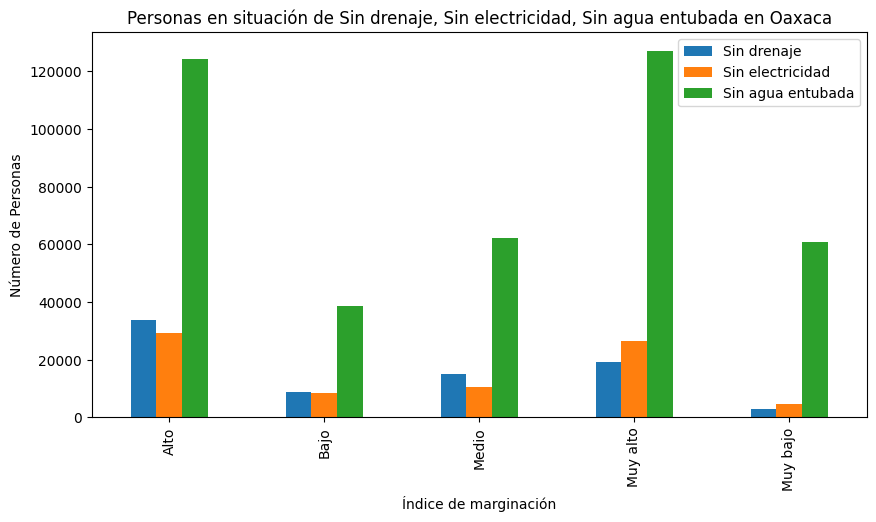

In [24]:
politicas_publicas('Oaxaca')

Yo sé que no la función debería devolver un DataFrame en formato parquet, sin embargo, a pesar de haber instalado lo que se me pidió, el error seguía persistiendo. Investignado encontré que decía que era un error de mi entorno virtual, lo lamento.
```python
ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

 Requirement already satisfied: six>=1.5 in c:\users\panda\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages (from python-dateutil>=2.8.1->pandas>=1.5.0->fastparquet) (1.16.0)
```

- #### Retomando
Hice algo muy sencillo, nada muy complejo. Una función que recibe un parámetro, en este caso la entidad que el político en cuestión desee analizar. Lo que regresa es una gráfica que indica el número de personas que se ven afectadas por la(s) variable(s) que él, o ella, haya seleccionado. Con esta gráfica puede tomar decisiones para saber cuáles son las variables que todas las clasificaciones sufren, y así, si desea ser seleccionado en las próximas votaciones, atacar la variable que más personas se ven involucradas. Con esto, él, o ella, tendría más impacto (en número de personas) al arreglar ese problema, aumentando sus probabilidades de ser elegido por la población.

## Conclusión

El trabajo dentro de este proyecto tuvo como fin, encontrar relación entre variables, encontrar los indicadores que hacen, o forman, a los índices de marginación. La marginación es un problema, no sólo de México, es un problema que se encuentra en muchos países; algunos de Latinoamérica. Es un problema que el gobierno debe de atender, y como podemos ver en las gráficas y en los DataFrames, a pesar de ser datos del 2020, siguen siendo muchas las personas que se ven afectadas por situaciones que nadie debería sufrir, personas que viven sin las mínimas necesidas básicas, no estamos hablando de lujos, sino de herramientas **básicas** que todos por derecho deberían tener.

## Referencias
1. Gobierno de México (2020). Índices de marginación 2020. Gob.mx. https://www.gob.mx/conapo/documentos/indices-de-marginacion-2020-284372
2. VS Code | Markdown Guide. (2023). Markdownguide.org. https://www.markdownguide.org/tools/vscode/
3. OpenAI. (2021). ChatGPT (Version 3.5) [Software]. Recuperado de https://openai.com 
‌
